# Análisis de tamaño de repositorios en Github
Este análisis netamente considera los tamaños de los repositorios en Github.

## Cargar dependencias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Cargar archivo CSV de entrada

In [2]:
# generamos DF a partir de CSV de entrada
input_file = '../csvs/repo_sizes_detail.csv'
raw_df = pd.read_csv(input_file)
raw_df

,project_id,size
0,0xEduardo/nodeless,138
1,0xayot/waas,450
2,20minutes/serverless-github-check,6741
3,20minutes/serverless-provisioned-memory-report,5600
4,2amigos/laravel-mail-api,1069
...,...,...
663,zacbe/url-shortener,180
664,zinxon/CantekWebApp-BE,4051
665,zkcloudworker/zkcloudworker-aws,952
666,zommerfelds/website-cz,4012


Copiamos este DataFrame para convertir el tipo de dato de las columnas a numérico

In [3]:
df = raw_df.copy()
df['size'] = pd.to_numeric(df['size'], errors='coerce')

In [4]:
# guardamos el nuevo DataFrame en un nuevo CSV
output_file = '../temp_data/github_repo_size.csv'
df.to_csv(output_file, index=False)

## Análisis estadístico

In [5]:
# resumen estadístico de la columna 'size'
repo_size_summary = df['size'].describe()

# máximo
max_value = df['size'].max()

# mínimo
min_value = df['size'].min()

# rango (diferencia entre máximo y mínimo)
range_value = max_value - min_value

# mediana
median_value = df['size'].median()

# varianza
variance_value = df['size'].var()

# desviación estándar
std_deviation_value = df['size'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(repo_size_summary)
print("\nMáx.:", max_value)
print("Mín.:", min_value)
print("Rango:", range_value)
print("Median:", median_value)
print("Varianza:", variance_value)
print("Standard deviation:", std_deviation_value)

Resumen estadístico:
count      668.00
mean      9354.67
std      31445.24
min        100.00
25%        315.75
50%       1035.00
75%       4080.00
max     461893.00
Name: size, dtype: float64

Máx.: 461893
Mín.: 100
Rango: 461793
Median: 1035.0
Varianza: 988803277.2986828
Standard deviation: 31445.242522497465


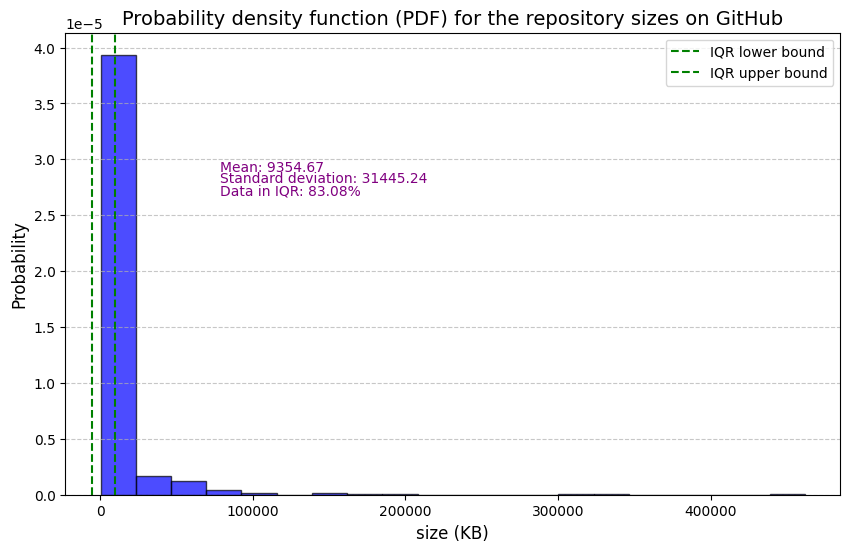

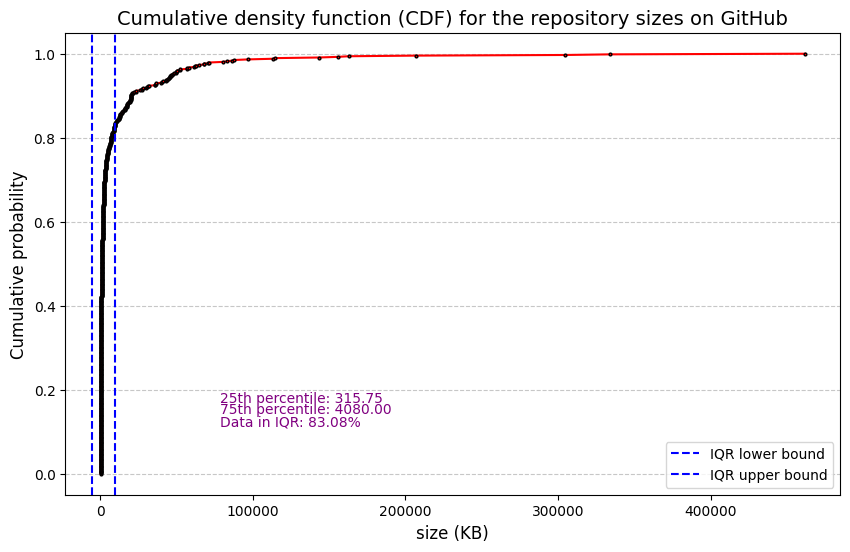

In [6]:
# extraer la columna 'size'
repo_size_data = df['size']

# calcular el rango intercuartil (IQR)
Q1 = repo_size_data.quantile(0.25)
Q3 = repo_size_data.quantile(0.75)
IQR = Q3 - Q1

# calcular el porcentaje de valores dentro de los límies del IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR
percentage_in_iqr = ((repo_size_data >= iqr_lower_bound) & (repo_size_data <= iqr_upper_bound)).mean() * 100

# Probability Density Function (PDF)
fig_pdf, ax_pdf = plt.subplots(figsize=(10, 6))
ax_pdf.hist(repo_size_data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax_pdf.set_xlabel('size (KB)', fontsize=12)
ax_pdf.set_ylabel('Probability', fontsize=12)
ax_pdf.set_title('Probability density function (PDF) for the repository sizes on GitHub', fontsize=14)
ax_pdf.tick_params(axis='both', labelsize=10)
ax_pdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_pdf.text(0.2, 0.7, 'Mean: {:.2f}'.format(repo_size_data.mean()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.text(0.2, 0.675, 'Standard deviation: {:.2f}'.format(repo_size_data.std()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.text(0.2, 0.650, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.axvline(iqr_lower_bound, color='green', linestyle='--', label='IQR lower bound')
ax_pdf.axvline(iqr_upper_bound, color='green', linestyle='--', label='IQR upper bound')
ax_pdf.legend(loc='upper right', fontsize=10)
pdf_file = '../paper/figs/pdf_repo_size_data.pdf'
fig_pdf.savefig(pdf_file, format='pdf', dpi=300)

# Cumulative Density Function (CDF)
fig_cdf, ax_cdf = plt.subplots(figsize=(10, 6))
sorted_data = np.sort(repo_size_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax_cdf.plot(sorted_data, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax_cdf.set_xlabel('size (KB)', fontsize=12)
ax_cdf.set_ylabel('Cumulative probability', fontsize=12)
ax_cdf.set_title('Cumulative density function (CDF) for the repository sizes on GitHub', fontsize=14)
ax_cdf.tick_params(axis='both', labelsize=10)
ax_cdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_cdf.text(0.2, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data, 25)), transform=ax_cdf.transAxes, fontsize=10, color='purple')
ax_cdf.text(0.2, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data, 75)), transform=ax_cdf.transAxes, fontsize=10, color='purple')
ax_cdf.text(0.2, 0.150, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax_cdf.transAxes, fontsize=10, color='purple')
ax_cdf.axvline(iqr_lower_bound, color='blue', linestyle='--', label='IQR lower bound')
ax_cdf.axvline(iqr_upper_bound, color='blue', linestyle='--', label='IQR upper bound')
ax_cdf.legend(loc='lower right', fontsize=10)
cdf_file = '../paper/figs/cdf_repo_size_data.pdf'
fig_cdf.savefig(cdf_file, format='pdf', dpi=300)

# Display the plots
plt.show()



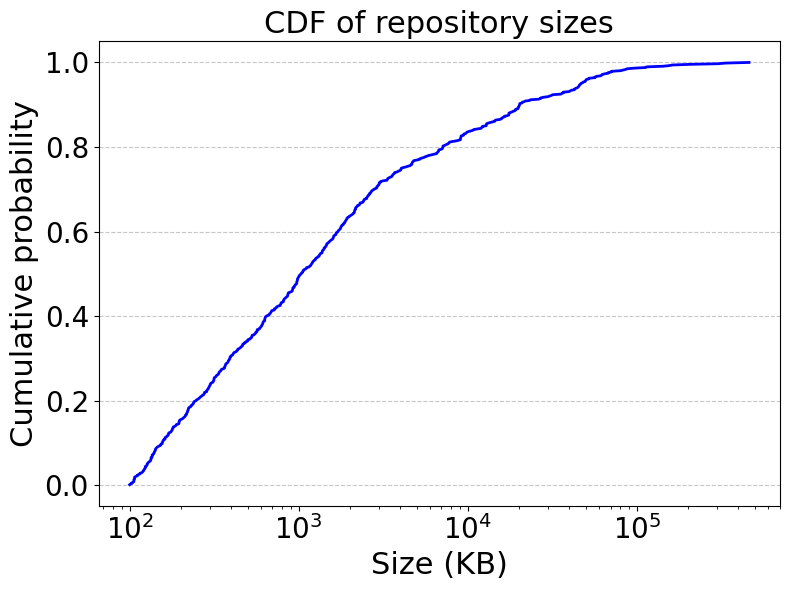

In [7]:
# crear 1 subplot
fig, ax2 = plt.subplots(figsize=(8, 6))

# calcular y graficar la función de distribución acumulada (CDF)
sorted_data = np.sort(repo_size_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, color='blue', linewidth=2)
ax2.set_xlabel('Size (KB)', fontsize=22)  # Increased font size
ax2.set_ylabel('Cumulative probability', fontsize=22)  # Increased font size
ax2.set_title('CDF of repository sizes', fontsize=22)  # Increased font size

# personalizar gráficos
ax2.tick_params(axis='both', labelsize=20)  # Increased tick label font size
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# ajustar escala
ax2.set_xscale('log')

# ajustar espaciado entre subplots y etiquetas
plt.tight_layout()

# guardar los plots como archivos de imagen
df_file = '../paper/figs/cdf_repo_size_data_log.pdf'
plt.savefig(df_file, format='pdf', dpi=300)  # ajustar DPI para salidas de alta resolución

# mostrar los plots
plt.show()

### Filtrado de datos aberrantes
En base a las observaciones anteriores, y a las curvas presentadas, se tiene un alto grado de varianza en torno a los valores extremos del tamaño de cada repositorio. Es posible hacer un filtrado de datos aberrantes, en base al rango intercuartil (IQR) del conjunto de datos, para obtener una gráfica y un análisis mucho más representativo, ya que el 83.83% de estos datos consiste en conteos que reflejan un poco mejor la realidad de la mayoría de los proyectos implementados en AWS Lambda.

In [8]:
# se remueven datos aberrantes del DataFrame
non_outliers_df = df[(df['size'] >= iqr_lower_bound) & (df['size'] <= iqr_upper_bound)]

#### Análisis estadístico

In [9]:
# resumen estadístico de la columna 'size'
repo_size_summary_filtered = non_outliers_df['size'].describe()

# máximo
max_value_filtered = non_outliers_df['size'].max()

# mínimo
min_value_filtered = non_outliers_df['size'].min()

# rango (diferencia entre máximo y mínimo)
range_value_filtered = max_value_filtered - min_value_filtered

# mediana
median_value_filtered = non_outliers_df['size'].median()

# varianza
variance_value_filtered = non_outliers_df['size'].var()

# desviación estándar
std_deviation_value_filtered = non_outliers_df['size'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(repo_size_summary_filtered)
print("\nMáx.:", max_value_filtered)
print("Mín.:", min_value_filtered)
print("Rango:", range_value_filtered)
print("Median:", median_value_filtered)
print("Varianza:", variance_value_filtered)
print("Standard deviation:", std_deviation_value_filtered)

Resumen estadístico:
count    555.00
mean    1529.77
std     1999.35
min      100.00
25%      262.00
50%      720.00
75%     1881.00
max     9499.00
Name: size, dtype: float64

Máx.: 9499
Mín.: 100
Rango: 9399
Median: 720.0
Varianza: 3997405.1505317595
Standard deviation: 1999.3511823918677


#### Nuevos gráficos de PDF y CDF

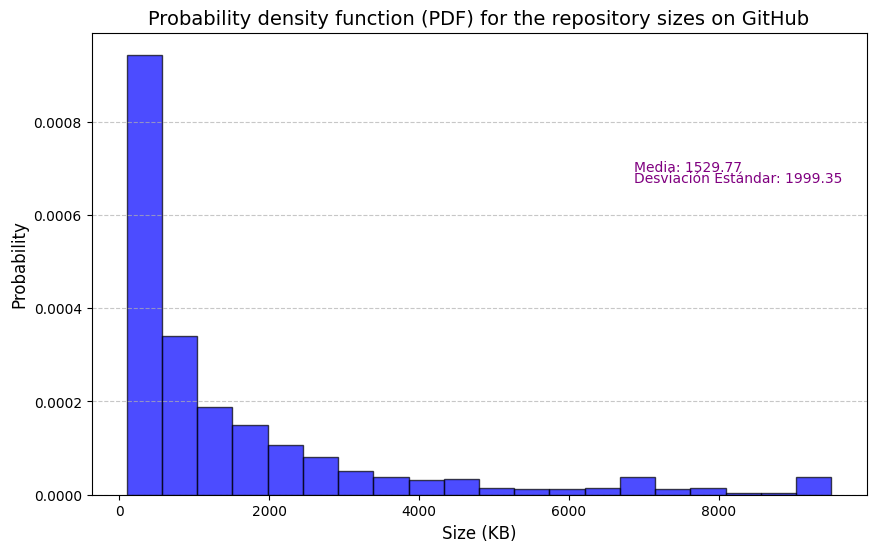

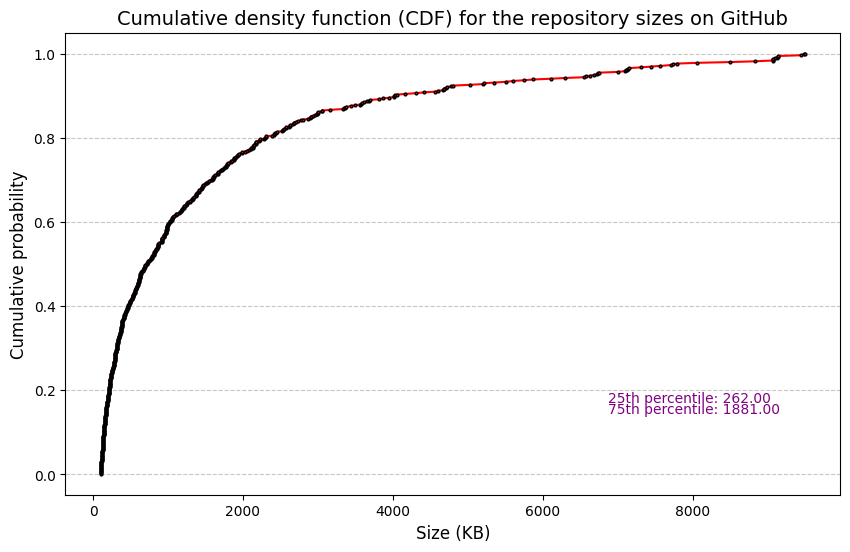

In [10]:
# extraer la columna 'size'
repo_size_data_filtered = non_outliers_df['size']

# Probability Density Function (PDF)
fig_pdf, ax_pdf = plt.subplots(figsize=(10, 6))
ax_pdf.hist(repo_size_data_filtered, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax_pdf.set_xlabel('Size (KB)', fontsize=12)
ax_pdf.set_ylabel('Probability', fontsize=12)
ax_pdf.set_title('Probability density function (PDF) for the repository sizes on GitHub', fontsize=14)
ax_pdf.tick_params(axis='both', labelsize=10)
ax_pdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_pdf.text(0.7, 0.7, 'Media: {:.2f}'.format(repo_size_data_filtered.mean()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.text(0.7, 0.675, 'Desviación Estándar: {:.2f}'.format(repo_size_data_filtered.std()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
pdf_file = '../paper/figs/pdf_repo_size_data_filtered.pdf'
fig_pdf.savefig(pdf_file, format='pdf', dpi=300)

# Cumulative Density Function (CDF)
fig_cdf, ax_cdf = plt.subplots(figsize=(10, 6))
sorted_data_filtered = np.sort(repo_size_data_filtered)
y = np.arange(1, len(sorted_data_filtered) + 1) / len(sorted_data_filtered)
ax_cdf.plot(sorted_data_filtered, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax_cdf.set_xlabel('Size (KB)', fontsize=12)
ax_cdf.set_ylabel('Cumulative probability', fontsize=12)
ax_cdf.set_title('Cumulative density function (CDF) for the repository sizes on GitHub', fontsize=14)
ax_cdf.tick_params(axis='both', labelsize=10)
ax_cdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_cdf.text(0.7, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 25)), transform=ax_cdf.transAxes, fontsize=10, color='purple')
ax_cdf.text(0.7, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 75)), transform=ax_cdf.transAxes, fontsize=10, color='purple')
cdf_file = '../paper/figs/cdf_repo_size_data_filtered.pdf'
fig_cdf.savefig(cdf_file, format='pdf', dpi=300)

# Display the plots
plt.show()

